In [71]:
# импортируем библиотеки numpy и pandas
import numpy as np
import pandas as pd

# импортируем библиотеку matplotlib для построения графиков
import matplotlib.pyplot as plt
%matplotlib inline

import mmap
import re
from nltk import tokenize

In [100]:
def getWords(text):
    return re.compile('\w+').findall(text)

def read_sentences(filename):
    last = ""
    with open(filename) as inp:
        while True:
            buf = inp.read(10240)
            if not buf:
                break
            sentences = re.split(r' *[\.\?!][\'"\)\]]* *', last + buf) #tokenize.sent_tokenize(last+buf)
            last = sentences.pop()
            for sentence in sentences:
                yield sentence
        yield last

def levenshteinDistance(s1, s2):
    if len(s1) > len(s2):
        s1, s2 = s2, s1

    distances = range(len(s1) + 1)
    for i2, c2 in enumerate(s2):
        distancesTemp = [i2+1]
        for i1, c1 in enumerate(s1):
            if c1 == c2:
                distancesTemp.append(distances[i1])
            else:
                distancesTemp.append(1 + min((distances[i1], distances[i1 + 1], distancesTemp[-1])))
        distances = distancesTemp
    return distances[-1]

# def getCosinDistance(vec1, vec2):
#      intersection = set(vec1.keys()) & set(vec2.keys())

#      sum1 = sum([vec1[x]**2 for x in vec1.keys()])
#      sum2 = sum([vec2[x]**2 for x in vec2.keys()])
#      denominator = math.sqrt(sum1) * math.sqrt(sum2)

#      if not denominator:
#         return 0.0
#      else:
#         return float(numerator) / denominator
    
def getClosestWordWithDiff(words, word, diff):
    for w in words:
        if levenshteinDistance(w, word) <= diff:
            return w;
    return word

In [101]:
wordCounts = pd.Series()
sentenceLengths = np.array([])

for sentence in read_sentences('test1.txt'):
    sentenceLengths = np.append(sentenceLengths, [len(sentence)])
    for word in getWords(sentence):
        tw = word.lower()
        tw = getClosestWordWithDiff(wordCounts.index, tw, 1)
        if tw in wordCounts.index:
            wordCounts[tw] += 1
        else:
            wordCounts[tw] = 1

print('В тексте найдено %d предложений со средней длиной %.1f.  %d слов' % (sentenceLengths.size, sentenceLengths.mean(), wordCounts.size))
print(wordCounts.index)

В тексте найдено 171 предложений со средней длиной 112.1.  851 слов
Index(['back', 'from', 'sea', 'martin', 'eden', 'came', 'homing', 'for',
       'california', 'with',
       ...
       'played', 'gazed', 'hungry', 'loveliness', 'marvelling', 'suitors',
       'listening', 'longing', 'listened', 'longed'],
      dtype='object', length=851)


               Count  Frequency
back               8   0.009401
from              12   0.014101
sea               16   0.018801
martin             4   0.004700
eden               3   0.003525
came              11   0.012926
homing             1   0.001175
for               40   0.047004
california         1   0.001175
with              31   0.036428
a                174   0.204465
lover              8   0.009401
desire             1   0.001175
his              126   0.148061
store              2   0.002350
of               136   0.159812
money              5   0.005875
exhausted          1   0.001175
he               432   0.507638
had               53   0.062280
shipped            2   0.002350
before             4   0.004700
mast              10   0.011751
treasure           5   0.005875
hunting            1   0.001175
schooner           1   0.001175
and              170   0.199765
solomon            1   0.001175
islands            1   0.001175
after              5   0.005875
...     

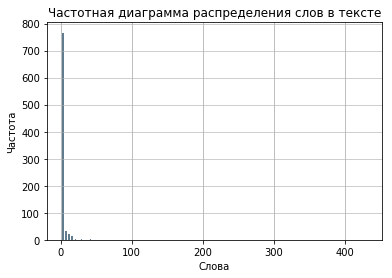

In [99]:
words_df = pd.DataFrame(
            {'Count': wordCounts})
words_count = words_df.shape[0]
words_df['Frequency'] = wordCounts / words_count
print(words_df)

wordCounts.plot.hist(grid=True, bins=100, rwidth=0.4,
                   color='#607c8e')

plt.title('Частотная диаграмма распределения слов в тексте')
plt.xlabel('Слова')
plt.ylabel('Частота')
plt.grid(axis='y', alpha=0.75)